In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import plotly.express as px

## Carga de datos

In [83]:
path= "./data/europe.csv"
df= pd.read_csv(path)

In [84]:
print("Cantidad de observaciones: ", df.shape[0])
print("Cantidad de features: ", df.shape[1])

Cantidad de observaciones:  28
Cantidad de features:  8


## Descripción de los features:
- Country: Nombre del paı́s.
- Area: área.
- GDP: producto bruto interno.
- Inflation: inflación anual.
- Life.expect: expectativa de vida media en años.
- Military: presupuesto militar.
- Pop.growth: tasa de crecimiento poblacional.
- Unemployment: tasa de desempleo.sempleo.


## Estadisticas descriptivas de los features:
Se observa el valor medio, el desvío estandar, los valores máximos y mínimos.

In [85]:
df.describe()

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,166422.535714,31860.714286,3.342857,78.122500,1.606071,0.117143,9.921429
std,165538.675951,14502.115792,1.398260,3.189156,0.801352,0.501965,4.677872
min,2586.000000,7200.000000,0.200000,68.740000,0.000000,-0.800000,2.800000
25%,48083.250000,20350.000000,2.575000,76.020000,1.095000,-0.182500,6.925000
50%,87980.500000,30500.000000,3.350000,79.530000,1.500000,0.065000,8.450000
75%,304176.250000,38750.000000,4.025000,80.320000,1.925000,0.397500,12.725000
max,603550.000000,80600.000000,8.000000,81.860000,4.300000,1.140000,21.700000


In [6]:
X= np.array(df.drop("Country", axis=1))

## Dispersión de las features
Para observa la dispersión de realizar un gráfico box plot.

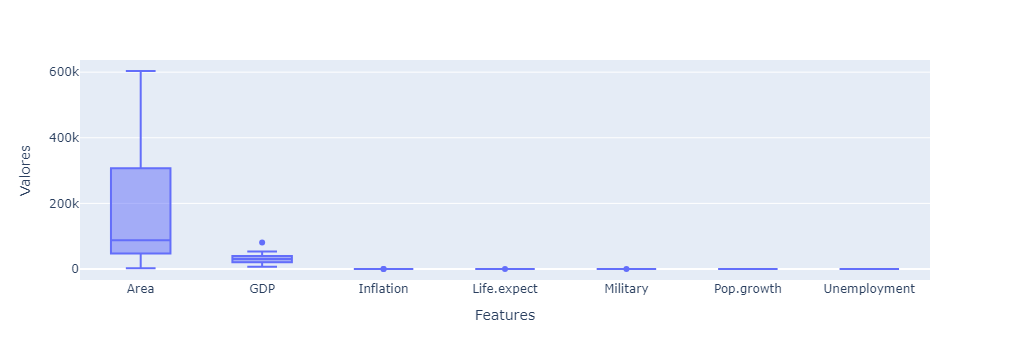

In [86]:
fig = px.box(df.drop("Country", axis=1))
fig.update_layout(showlegend=False,
                     xaxis_title="Features",
    yaxis_title="Valores",)

fig.show()

En el boxplot, vemos que los valores de los features son muy diferentes entre si, especialmente el valor que corresponde al área. Por ese motivo se realizar una estandarización.

## Estandarización de los features:
Por cada features se resta su valor medio y se divide por el desvío estandard.

In [90]:
def standarization(array):
    mean = np.mean(array)
    std_dev = np.std(array)
    normalized_array = (array - mean) / std_dev
    return normalized_array

In [91]:
X_standard= np.empty(X.shape)
for i in range(X.shape[1]):
   X_standard[:,i]= standarization(X[:,i])

In [92]:
df_standard= df.drop("Country", axis=1)
names=  df.drop("Country", axis=1).columns
for i in range(df_standard.shape[1]):
   
    df_standard[names[i]]= X_standard[:,i]

## Dispersión de features estandarizadas:
Se gráfica nuevamente el boxplot pero con los datos estandarizados.

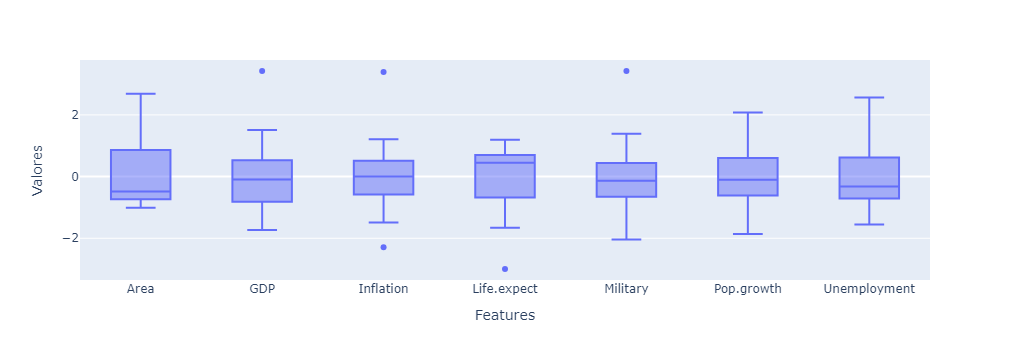

In [93]:
fig = px.box(df_standard)
fig.update_layout(showlegend=False,
                     xaxis_title="Features",
    yaxis_title="Valores",)

fig.show()


Al estandarizar, se observa que el GDP, la inflación, el gasto militar y el crecimiento poblacional no tienen gran dispersión, la mediana coincide con el centro de la caja. En cambio se observa que el Area, la expectativa de vida y el desempleo si lo tienen.

## Calculo de PCA: Procedimiento "Artesanal"

In [94]:
#Calculo de matriz de correlación en datos normalizados
s= np.corrcoef(X_standard, rowvar=False)

In [17]:
#Computo de autovalores y actovectores.
autovalores, autovectores = LA.eig(s)

In [18]:
autovalores

array([3.22716568, 1.18712341, 1.06319053, 0.45784862, 0.12564189,
       0.16867389, 0.77035598])

In [95]:
#Ordenamiento de auto valores de mayor a menor
autovalores_sort= np.sort(autovalores)[::-1]

In [20]:
autovalores_sort

array([3.22716568, 1.18712341, 1.06319053, 0.77035598, 0.45784862,
       0.16867389, 0.12564189])

In [96]:
#Ordenamiento de autovectores, según autovalores ordenados.
autovectores_sort = [autovectores[:, i] for i in np.argsort(autovalores)[::-1]]


In [119]:
#Obtenemos PC1, cómo el auto vector formado por el mayor autovalor. De módo análogo obtenemos PC2

In [122]:
loadings_PC1= autovectores_sort[0]
loadings_PC2= autovectores_sort[1]

In [123]:
loadings_PC1

array([-0.1248739 ,  0.50050586, -0.40651815,  0.48287333, -0.18811162,
        0.47570355, -0.27165582])

In [124]:
loadings_PC2

array([ 0.1728722 ,  0.13013955,  0.36965724, -0.2652478 , -0.65826689,
       -0.08262198, -0.55320371])

In [25]:
X_names= np.array(df.drop("Country", axis=1).columns)

In [26]:
features=X_names

## Gráficos de cargas vs features en PC1

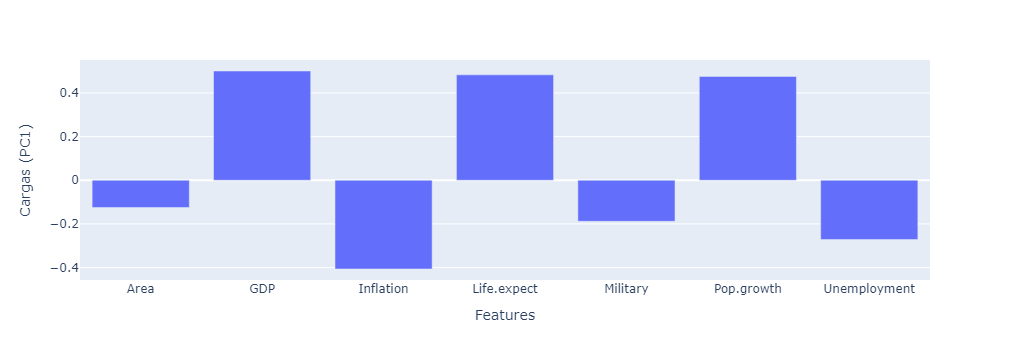

In [105]:
fig= px.bar(x=X_names,y=loadings_PC1)
fig.update_layout(showlegend=False,
                     xaxis_title="Features",
    yaxis_title="Cargas (PC1)",)

fig.show()

## Análisis de Loadings de PC1:
El Area, la inflación, el presupuesto militar y el desempleo de correlación de forma negativa con el valor de la PC1. Uno diría que estás son variables negativas para realizar una inversión. En cambio, el producto bruto interno, la expectativa de vida y el crecimiento poblacional se correlacionan positivamente con el PC1, uno a priori diría que estos son aspectos deseados para una inversión.


In [125]:
#Calculo de PC1
PC1= np.dot(X_standard, loadings_PC1)
#Calculo de PC2
PC2= np.dot(X_standard, loadings_PC2)

## Gráfico de PC1 vs paises

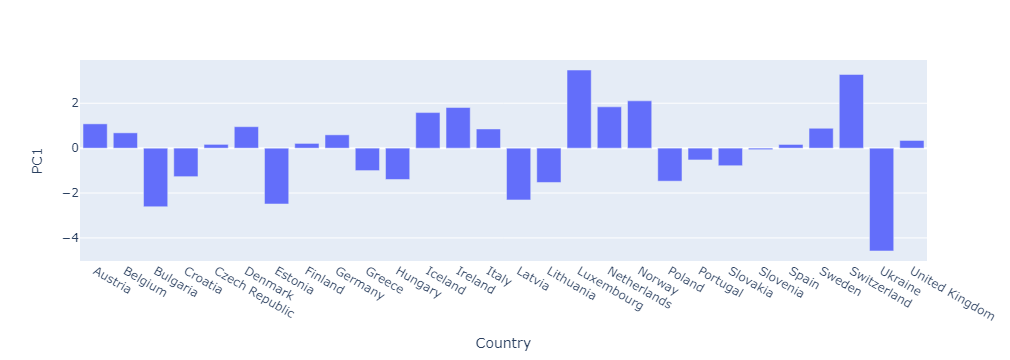

In [117]:
fig= px.bar(x=df["Country"],y=PC1)
fig.update_layout(showlegend=False,
                     xaxis_title="Country",
    yaxis_title="PC1")

fig.show()

## ## Gráfico ordenado de PC1 vs paisess

In [112]:
paises= np.array(df["Country"])
index_sort= np.argsort(PC1)
pc1_ordenado= np.take_along_axis(PC1, index_sort, axis=0) 
paises_ordenados= np.take_along_axis(paises, index_sort, axis=0) 

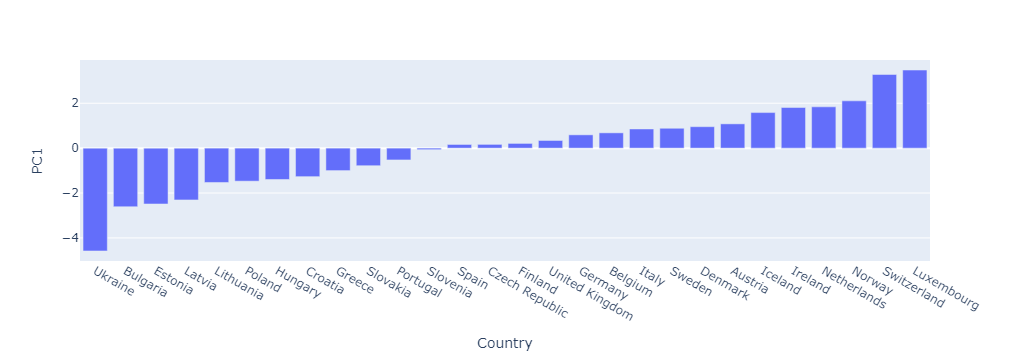

In [118]:
fig= px.bar(x=paises_ordenados,y=pc1_ordenado)
fig.update_layout(showlegend=False,
                     xaxis_title="Country",
    yaxis_title="PC1")

fig.show()

En el gráfico de barras que representa el PC1 vs países. Vemos que los valores positivos representan a los países que menos inflación tienen, menos área, menos inversión militar y menos desempleo. Cómo es el caso de Luxemburgo, quién posee el mayor produto interno. En el otro extremo del gráfico vemos a Ucrania, que es el país que mayor área tiene y mayor descenso poblacional y menor producto bruto. 

## Biplot
Se gráfica PC2 vs PC1.

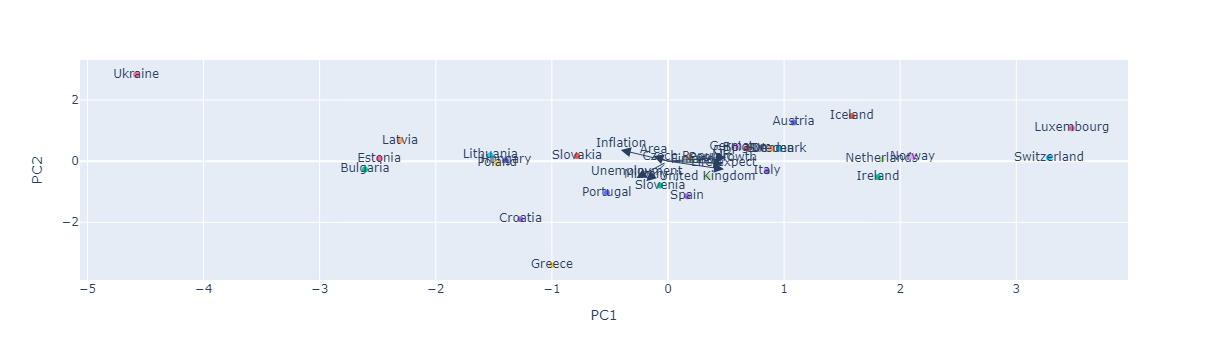

In [158]:
components= np.column_stack((PC1,PC2))

#Gráfico PC1 y PC2, indico que pais es cada punto.
fig = px.scatter(components, x=0, y=1, color=df['Country'], text=df['Country']) #

for i, feature in enumerate(features):
    fig.add_annotation(
        
        axref="x", ayref="y",
        ax=0, ay=0,
        x=loadings_PC1[i],
        y=loadings_PC2[i],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="center",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings_PC1[i],
        y=loadings_PC2[i],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=-1,
    )
# fig.update_xaxes(range=[-5, 5])
# fig.update_yaxes(range=[-5, 5])  
#fig.update_layout(width=1280, height= 1280)
fig.update_layout(showlegend=False,
                     xaxis_title="PC1",
    yaxis_title="PC2",)

fig.show()

En el biplot, se observa que la máxima variabilidad se da en el eje de PC1.
En PC1netivoo, se observan por un lado los países con mayor área, mayor inflación, mayor desempleo, menos expectativa de vida, menor crecimiento poblacional y menor producto bruto.
En cambio en PCpositivovo, se observan los de mayor producto bruto, mayor crecimiento poblacional y mayor expectativa de vida.
Por lo tanto, se concluye que en este análisis mayornor índice posible, da mayores certezas para invertir en un país.


## Cálculo de PCA utilizando la biblioteca sklearn

In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_standard)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.46102367 0.16958906]
[9.50582132 5.76536689]


In [160]:
#La librería representa explicación de la varianza de cada componente. En este caso PC1 representa el más del 46% y PC2 casi el 17%
pca.explained_variance_ratio_

array([0.46102367, 0.16958906])

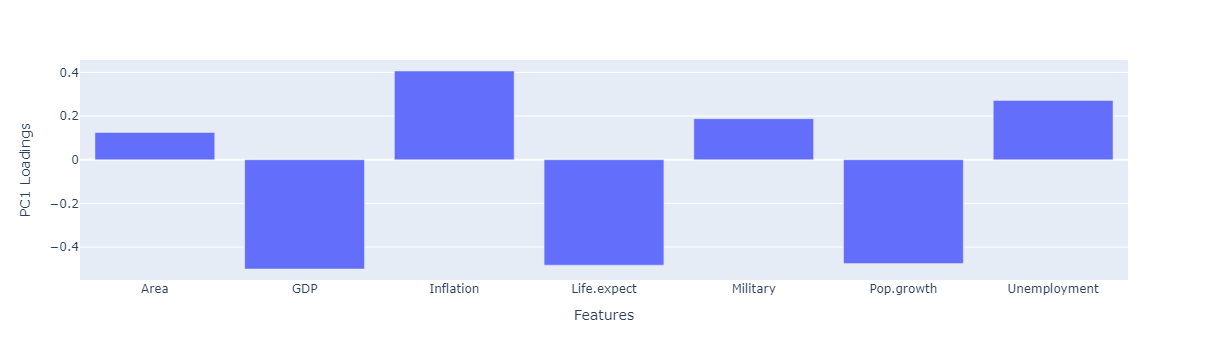

In [161]:
#Gráfico de Cargas PC1
fig= px.bar(x= X_names, y=pca.components_[0])
fig.update_layout(showlegend=False,
                     xaxis_title="Features",
    yaxis_title="PC1 Loadings",)

Si bien obsrevamos que la cargas en valor son iguales a las calculadas manualmente, vemos que la correlación es inversa.

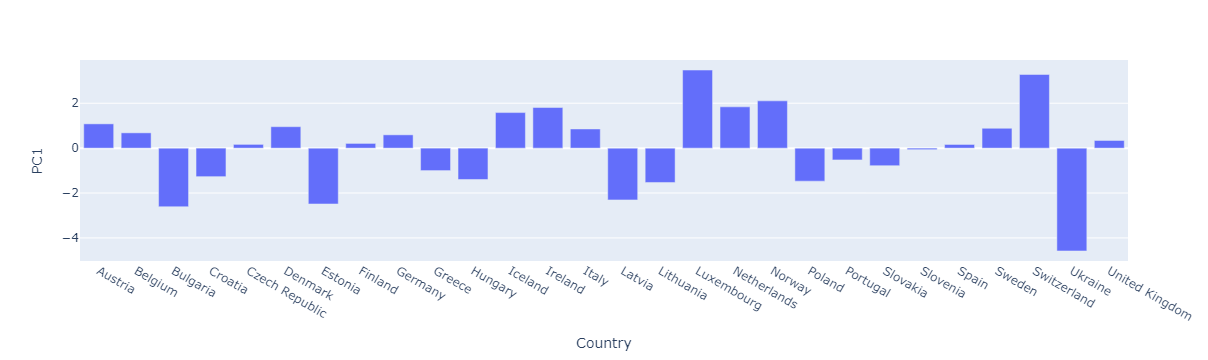

In [162]:
#Gráfico de PC1 vs Países
fig= px.bar(x= df["Country"], y=components[:,0])
fig.update_layout(showlegend=False,
                     xaxis_title="Country",
    yaxis_title="PC1",)
fig.show()

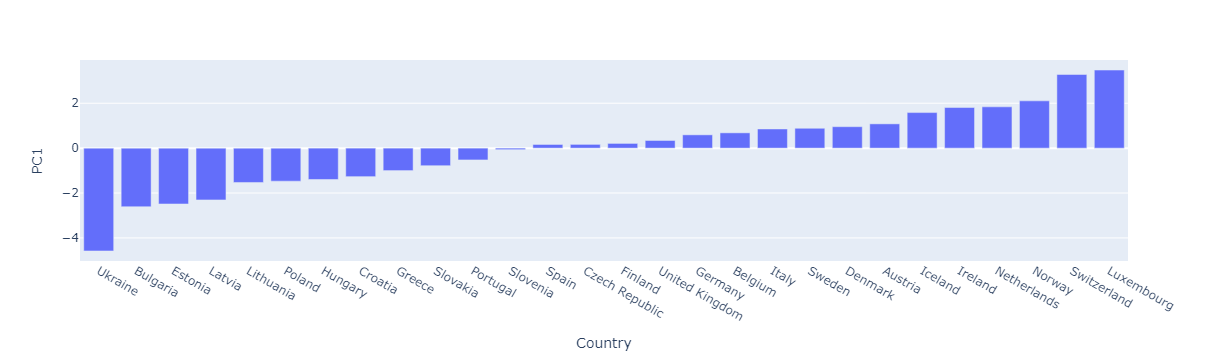

In [163]:
#Gráfico PC1 vs Países ordenado
paises= np.array(df["Country"])
index_sort= np.argsort(components[:,0])
pc1_ordenado= np.take_along_axis(components[:,0], index_sort, axis=0) 
paises_ordenados= np.take_along_axis(paises, index_sort, axis=0) 
fig= px.bar(x= paises_ordenados, y=pc1_ordenado)
fig.update_layout(showlegend=False,
                     xaxis_title="Country",
    yaxis_title="PC1",)
fig.show()

Se observa que los resultados obtenidos son iguales al cálculo manual, aunque ahora los valores negativos son los peores para invertir.

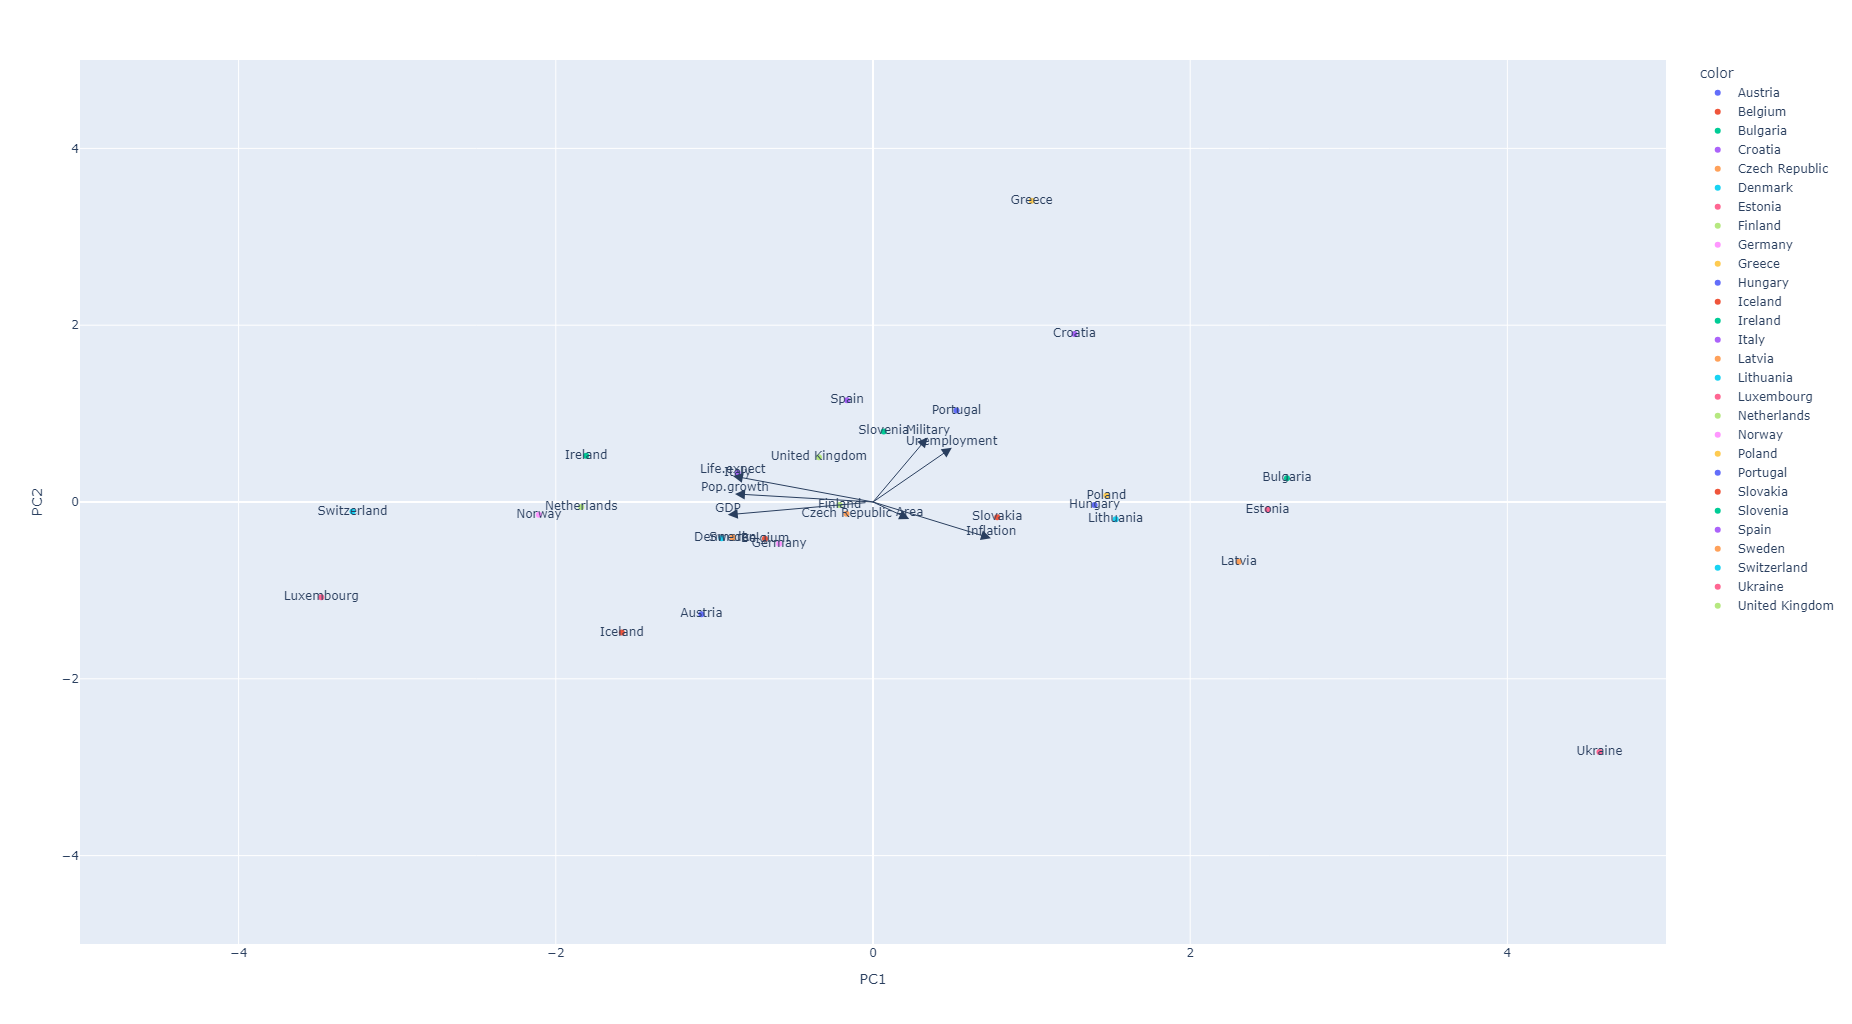

In [151]:
#Gráfico Biplot.
components = pca.fit_transform(X_standard)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['Country'], text=df['Country']) #

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=-1,
    )
fig.update_xaxes(range=[-5, 5])
fig.update_yaxes(range=[-5, 5])  
fig.update_layout(width=1024, height= 1024)
fig.update_layout(showlegend=True,
                     xaxis_title="PC1",
    yaxis_title="PC2",)

fig.show()

El gráfico es igual al calculado manualmente, pero con los ejes invertidos

## Conclusiones Finales
Se llevo adelante el análisis del dataset, primero observado la dispersión de cada data.
Luego se cálculo PCA de forma "Manual" y con la librería "Sklearn". Donde se obtuvieron los mismos resultados, aunque de signo cambiado.
En el gráfico de cargas de PC1 vs features se observo la correlación positiva y negativa de los features respecto a PC1.
En el gráfico de PC1 vs paises ordenados se observa cuales son los peores y mejores países de para invertir. En el caso del cálculo manual, mientras mayor es el valor, mejor es.
En el gráfico biplot, se pueden observar como influyen cada uno de los features en los valores de PC1 y PC2, es una representación de 2 dimensiones que permite analizar los features.
Respecto al análisis puntual de los datos, se observó que Luxemburgo y Suiza son los mejores países para invertir, presentan alto PIB, bajo desempleo, un área pequeña, y bajo gasto militar.
En cambio, en los peores paises para invertir aparecen Ucrania y Bulgaría. Ucrania presenta la mayor área de todos los paises analizados, el más bajo PIB, y bajo crecimiento población. En el caso de bulgaria, tiene un bajo PBI y una alta inflación.